# Advanced Visualization

Nama: Windy Mega Melani
<br>
Code: PYTN-KS04-003
<br>
Python for Data Science

# Visualisasi Menengah 1

In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can

Type    Coverage          OdName  AREA AreaName   REG  \
0    Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1    Immigrants  Foreigners         Albania   908   Europe   925   
2    Immigrants  Foreigners         Algeria   903   Africa   912   
3    Immigrants  Foreigners  American Samoa   909  Oceania   957   
4    Immigrants  Foreigners         Andorra   908   Europe   925   
..          ...         ...             ...   ...      ...   ...   
190  Immigrants  Foreigners        Viet Nam   935     Asia   920   
191  Immigrants  Foreigners  Western Sahara   903   Africa   912   
192  Immigrants  Foreigners           Yemen   935     Asia   922   
193  Immigrants  Foreigners          Zambia   903   Africa   910   
194  Immigrants  Foreigners        Zimbabwe   903   Africa   910   

                RegName  DEV             DevName  1980  ...  2012  2013  \
0         Southern Asia  902  Developing regions    16  ...  2635  2004   
1       Southern Europe  901   Developed regions     1  ...   620   603   
2       Northern Africa  902  Developing regions    80  ...  3774  4331   
3             Polynesia  902  Developing regions     0  ...     0     0   
4       Southern Europe  901   Developed regions     0  ...     1     1   
..                  ...  ...                 ...   ...  ...   ...   ...   
190  South-Eastern Asia  902  Developing regions  1191  ...  1731  2112   
191     Northern Africa  902  Developing regions     0  ...     0     0   
192        Western Asia  902  Developing regions     1  ...   174   217   
193      Eastern Africa  902  Developing regions    11  ...    46    59   
194      Eastern Africa  902  Developing regions    72  ...   437   407   

     Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  \
0            NaN          NaN          NaN          NaN          NaN   
1            NaN          NaN          NaN          NaN          NaN   
2            NaN          NaN          NaN          NaN          NaN   
3            NaN          NaN          NaN          NaN          NaN   
4            NaN          NaN          NaN          NaN          NaN   
..           ...          ...          ...          ...          ...   
190          NaN          NaN          NaN          NaN          NaN   
191          NaN          NaN          NaN          NaN          NaN   
192          NaN          NaN          NaN          NaN          NaN   
193          NaN          NaN          NaN          NaN          NaN   
194          NaN          NaN          NaN          NaN          NaN   

     Unnamed: 48  Unnamed: 49  Unnamed: 50  
0            NaN          NaN          NaN  
1            NaN          NaN          NaN  
2            NaN          NaN          NaN  
3            NaN          NaN          NaN  
4            NaN          NaN          NaN  
..           ...          ...          ...  
190          NaN          NaN          NaN  
191          NaN          NaN          NaN  
192          NaN          NaN          NaN  
193          NaN          NaN          NaN  
194          NaN          NaN          NaN  

[195 rows x 51 columns]

In [4]:
print(df_can.shape) #mencari tahu berapa banyak entri di kumpulan data

(195, 51)


In [5]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1,inplace=True)

df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.columns=list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total']=df_can.sum(axis=1)
years=list(map(str, range(1980,2014)))
print('data dimensi:', df_can.shape)

data dimensi: (195, 46)


In [6]:
df_can.drop(['Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48','Unnamed: 49','Unnamed: 50'], axis=1,inplace=True)

In [7]:
df_can.shape

(195, 39)

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib versi: ',mpl.__version__)

Matplotlib versi:  3.3.4


## waffle charts

In [9]:
df_dsn=df_can.loc[['Denmark','Norway','Sweden'],:]
df_dsn

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2006  2007  2008  2009  2010  2011  2012  \
Country                    ...                                             
Denmark    93    73    93  ...   101    97   108    81    92    93    94   
Norway     31    54    56  ...    53    73    66    75    46    49    53   
Sweden    128   158   187  ...   139   193   165   167   159   134   140   

         2013  Unnamed: 43   Total  
Country                             
Denmark    81          NaN  3901.0  
Norway     59          NaN  2327.0  
Sweden    140          NaN  5866.0  

[3 rows x 39 columns]

Step 1: menentukan proporsi setiap kategori sehubungan dengan totalnya

In [10]:
total_values=sum(df_dsn['Total'])
category_proportions=[(float(value)/total_values) for value in df_dsn['Total']]

for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i]+': ' + str(proportion))

Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744


Step 2: menentukan ukuran keseluruhan dari waffle chart

In [11]:
width=40
height=10
total_num_tiles=width*height

print('Total number of tiles is ', total_num_tiles)

Total number of tiles is  400


Step 3: menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing - masing kategori

In [12]:
tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]

for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ': ' + str(tiles))

Denmark: 129
Norway: 77
Sweden: 194


Step 4: membuat matriks yang menyerupai waffle dan mengisinya

In [13]:
waffle_chart = np.zeros((height,width))

category_index=0
tile_index=0

for col in range(width):
    for row in range(height):
        tile_index +=1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index+=1
        
        waffle_chart[row,col]=category_index
print('Waffle chart populated')

Waffle chart populated


In [14]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Step 5: memetakan matriks waffle chart menjadi visual

<Figure size 432x288 with 0 Axes>

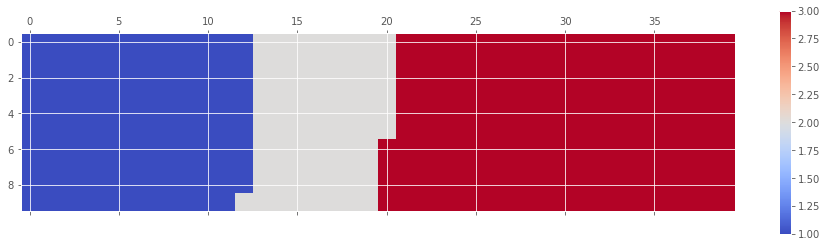

In [15]:
fig=plt.figure()

colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

Step 6: mempercantik chart

([], [])

<Figure size 432x288 with 0 Axes>

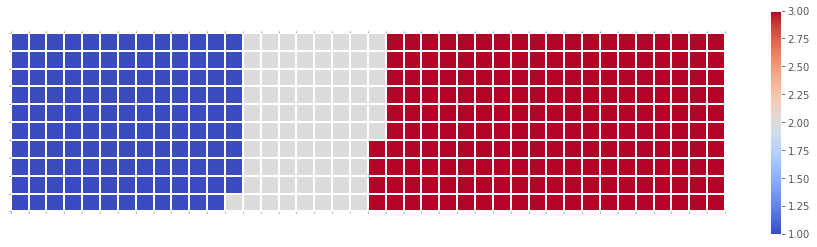

In [16]:
fig=plt.figure()

colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax=plt.gca()

ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(height),1),minor=True)

ax.grid(which='minor',color='w',linestyle='-',linewidth=2)

plt.xticks([])
plt.yticks([])

Step 7: menambahkan legend

<Figure size 432x288 with 0 Axes>

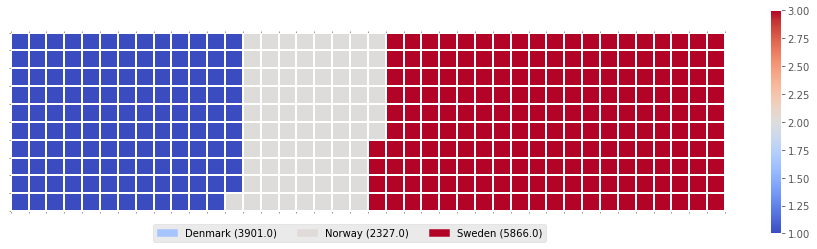

In [17]:
fig = plt.figure()

colormap=plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

ax=plt.gca()

ax.set_xticks(np.arange(-.5,(width),1),minor=True)
ax.set_yticks(np.arange(-.5,(height),1),minor=True)

ax.grid(which='minor',color='w',linestyle='-',linewidth=2)

plt.xticks([])
plt.yticks([])

values_cumsum = np.cumsum(df_dsn['Total'])
total_values=values_cumsum[len(values_cumsum)-1]

legend_handles=[]
for i, category in enumerate(df_dsn.index.values):
    label_str=category+' (' + str(df_dsn['Total'][i]) + ')'
    color_val=colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val,label=label_str))
    
plt.legend(handles=legend_handles,
          loc='lower center',
          ncol=len(df_dsn.index.values),
          bbox_to_anchor=(0.,-0.2,0.95,.1)
          )

Cara lebih mudah daripada 7 step di atas:

In [18]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    total_values=sum(values)
    category_proportions=[(float(value)/total_values) for value in values]
    
    total_num_tiles = width * height
    print('Total number of tiles is', total_num_tiles)
    
    tiles_per_category=[round(proportion*total_num_tiles) for proportion in category_proportions]
    
    for i, tiles in enumerate(tiles_per_category):
        print(df_dsn.index.values[i]+': ' + str(tiles))
        
    waffle_chart = np.zeros((height,width))
    
    category_index=0
    tile_index=0
    
    for col in range(width):
        for row in range(height):
            tile_index +=1
            
            if tile_index>sum(tiles_per_category[0:category_index]):
                category_index+=1
            
            waffle_chart[row,col]=category_index
            
    
    fig=plt.figure()
    
    colormap=plt.cm.coolwarm
    plt.matshow(waffle_chart,cmap=colormap)
    plt.colorbar()
    
    ax=plt.gca()
    
    ax.set_xticks(np.arange(-.5,(width),1),minor=True)
    ax.set_yticks(np.arange(-.5,(height),1),minor=True)
    
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
    
    plt.xticks([])
    plt.yticks([])
    
    values_cumsum=np.cumsum(values)
    total_values=values_cumsum[len(values_cumsum)-1]
    
    legend_handles=[]
    for i, category in enumerate(categories):
        if value_sign =='%':
            label_str=category+' (' + str(values[i]) + value_sign + ')'
        else:
            label_str=category+' (' + value_sign + str(values[i]) + ')'

        color_val=colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
        
    plt.legend(
    handles= legend_handles,
    loc='lower center',
    ncol=len(categories),
    bbox_to_anchor=(0.,-0.2,0.95,.1))

In [19]:
width = 40
height = 10

categories = df_dsn.index.values
values=df_dsn['Total']

colormap=plt.cm.coolwarm

Total number of tiles is 400
Denmark: 129
Norway: 77
Sweden: 194


<Figure size 432x288 with 0 Axes>

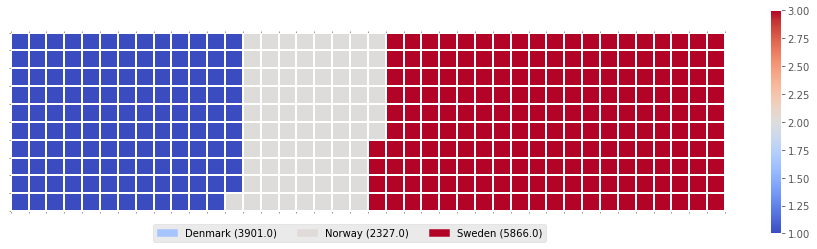

In [20]:
create_waffle_chart(categories, values, height, width, colormap)

## Word Clouds

In [21]:
!pip3 install wordcloud

In [22]:
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [23]:
alice_novel = open('alice_novel.txt','r').read()

print('FILE DOWNLOADED AND SAVED')

FILE DOWNLOADED AND SAVED


In [24]:
stopwords=set(STOPWORDS)

In [25]:
alice_wc=WordCloud(
background_color='white',
max_words=2000,
stopwords=stopwords
)

alice_wc.generate(alice_novel)

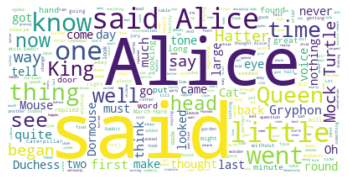

In [26]:
plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

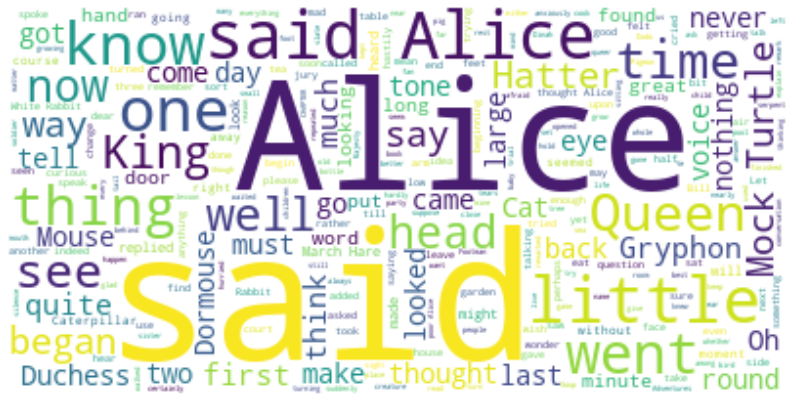

In [27]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

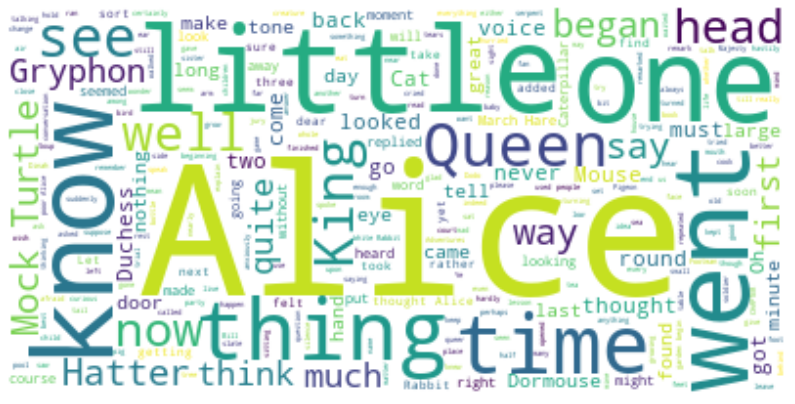

In [28]:
stopwords.add('said')

alice_wc.generate(alice_novel)

fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [29]:
alice_mask = np.array(Image.open('alice_mask.png'))

print('Image downloaded and saved')

Image downloaded and saved


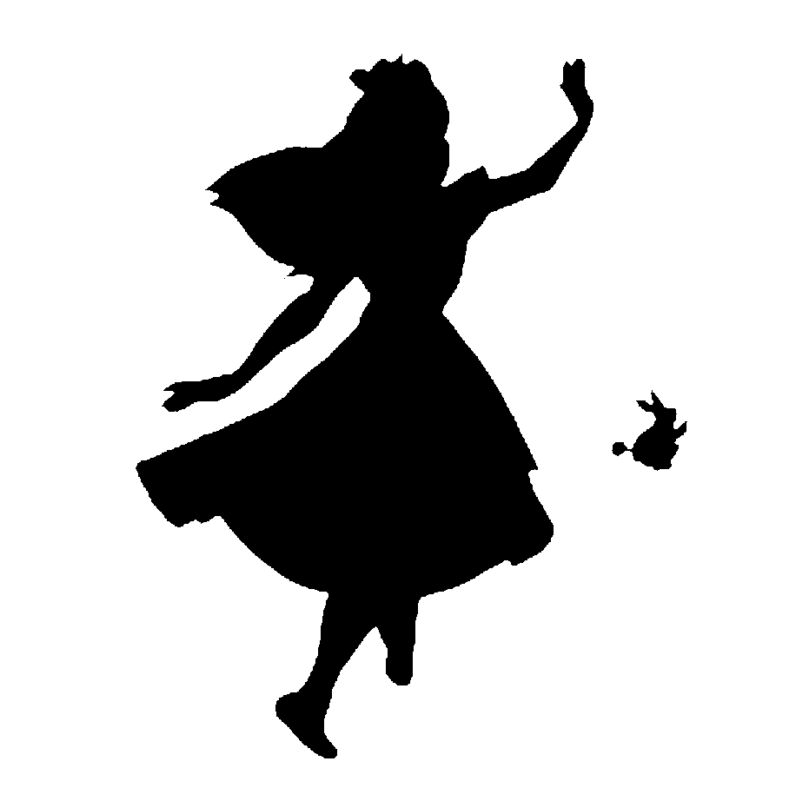

In [30]:
fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

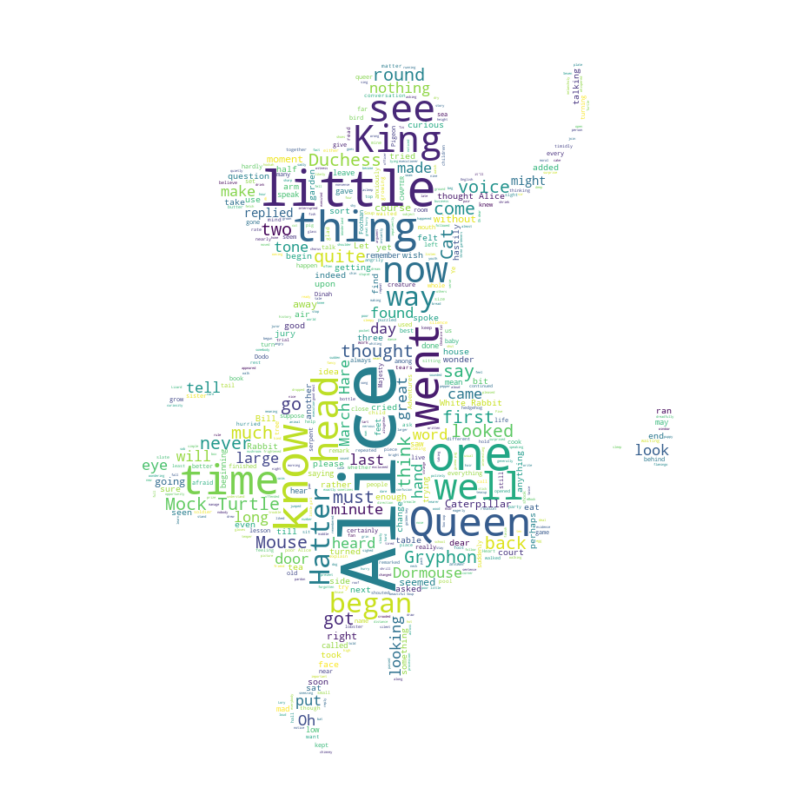

In [31]:
alice_wc = WordCloud(background_color='white', max_words=3000,
                    mask=alice_mask, stopwords=stopwords)

alice_wc.generate(alice_novel)

fig=plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc,interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2006  2007  2008  2009  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3009  2652  2111  1746   
Albania            0     0     0     0     1  ...   856   702   560   716   
Algeria           71    69    63    44    69  ...  4807  3623  4005  5393   
American Samoa     0     0     0     0     0  ...     1     0     0     0   
Andorra            0     0     0     0     2  ...     1     1     0     0   

                2010  2011  2012  2013  Unnamed: 43    Total  
Country                                                       
Afghanistan     1758  2203  2635  2004          NaN  58639.0  
Albania          561   539   620   603          NaN  15699.0  
Algeria         4752  4325  3774  4331          NaN  69439.0  
American Samoa     0     0     0     0          NaN      6.0  
Andorra            0     0     1     1          NaN     15.0  

[5 rows x 39 columns]

In [33]:
total_immigration=df_can['Total'].sum()
total_immigration

6409153.0

In [34]:
max_words=120
word_string=''
for country in df_can.index.values:
    if len(country.split(' '))==1:
        repeat_num_times=int(df_can.loc[country,'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ')*repeat_num_times)
        
word_string

'Afghanistan Algeria Bangladesh China China China China China China China China China China China China Colombia Egypt France France Germany Guyana Haiti India India India India India India India India India India India India Iraq Israel Jamaica Lebanon Lebanon Mexico Morocco Pakistan Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Poland Portugal Romania '

In [35]:
wordcloud=WordCloud(background_color='white').generate(word_string)

print('Word Cloud Created')

Word Cloud Created


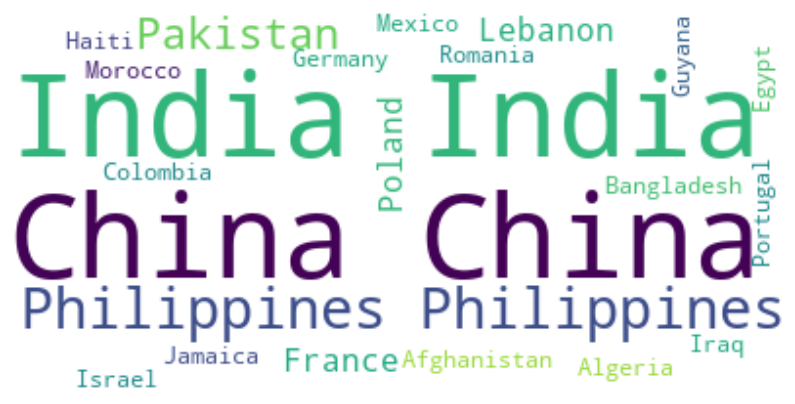

In [36]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Regression plots

In [37]:
import seaborn as sns

In [38]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index=map(float,df_tot.index)

df_tot.reset_index(inplace=True)

df_tot.columns=['year','total']

In [39]:
df_tot.head()

year   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

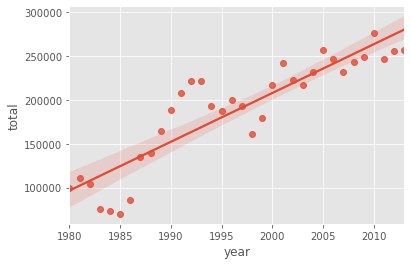

In [40]:
ax=sns.regplot(x='year', y='total', data=df_tot)

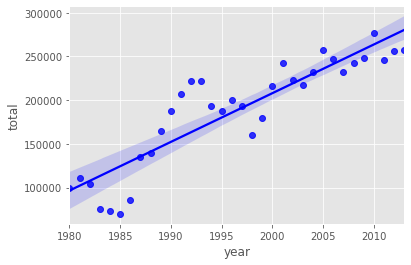

In [41]:
ax=sns.regplot(x='year', y='total', data=df_tot, color='blue')

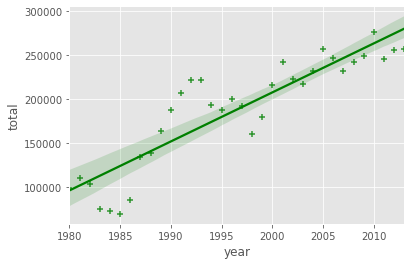

In [42]:
ax=sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

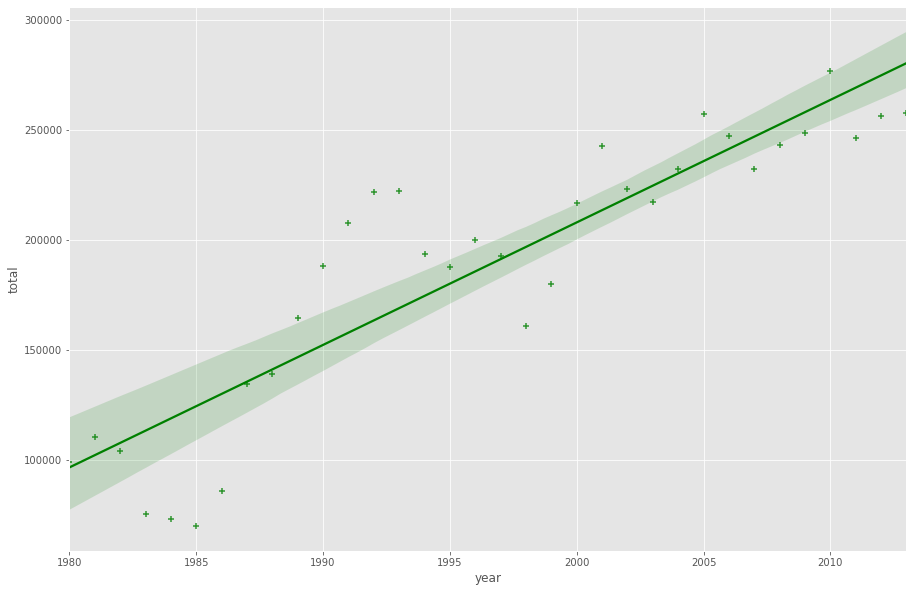

In [43]:
plt.figure(figsize=(15,10))
ax=sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

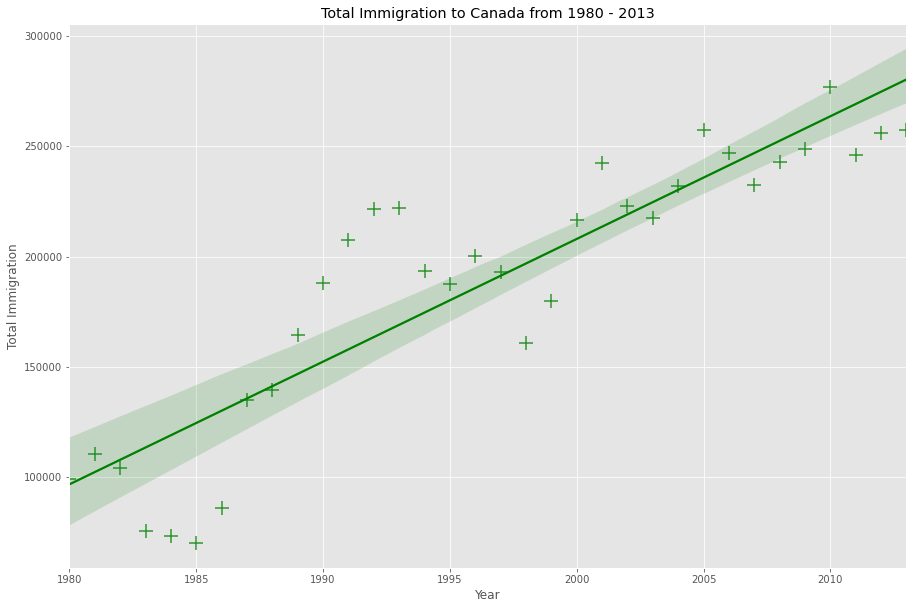

In [44]:
plt.figure(figsize=(15,10))
ax=sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

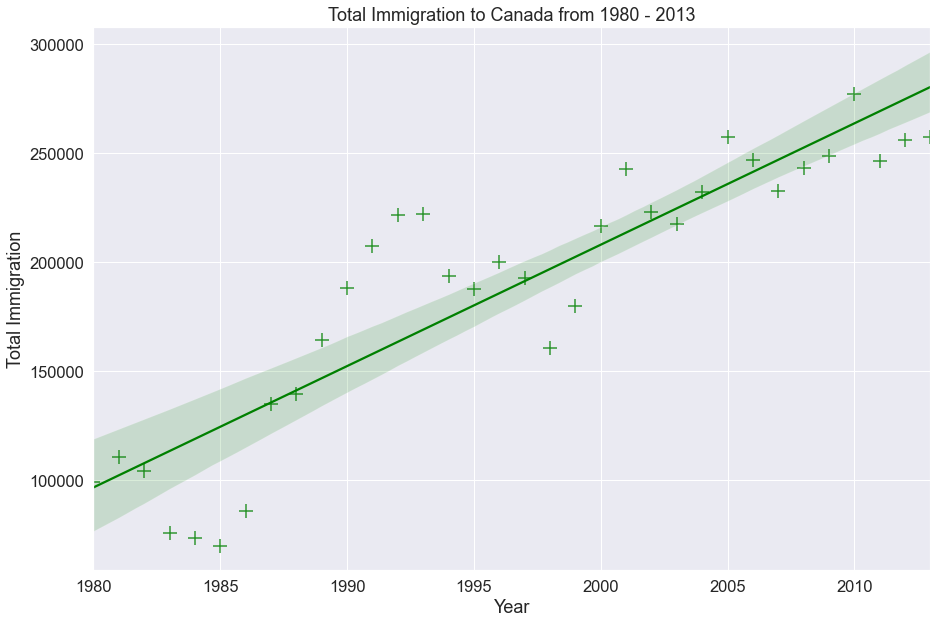

In [45]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)

ax=sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

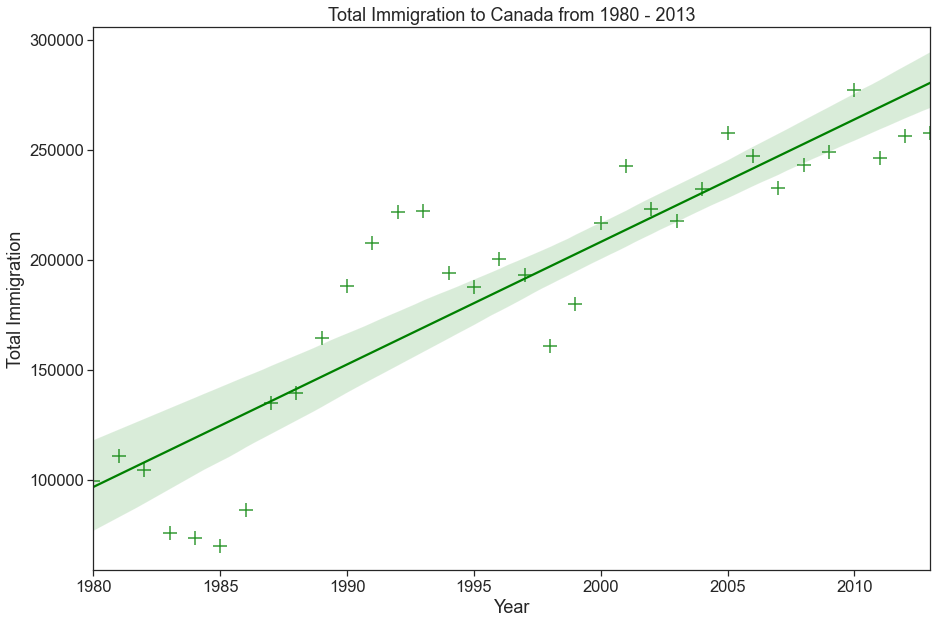

In [46]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('ticks')

ax=sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

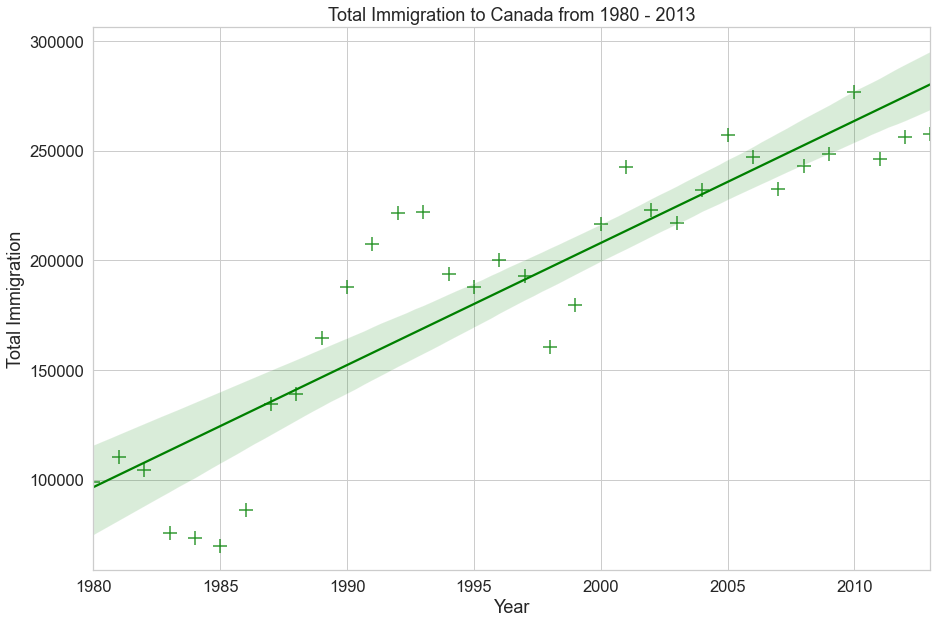

In [47]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax=sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

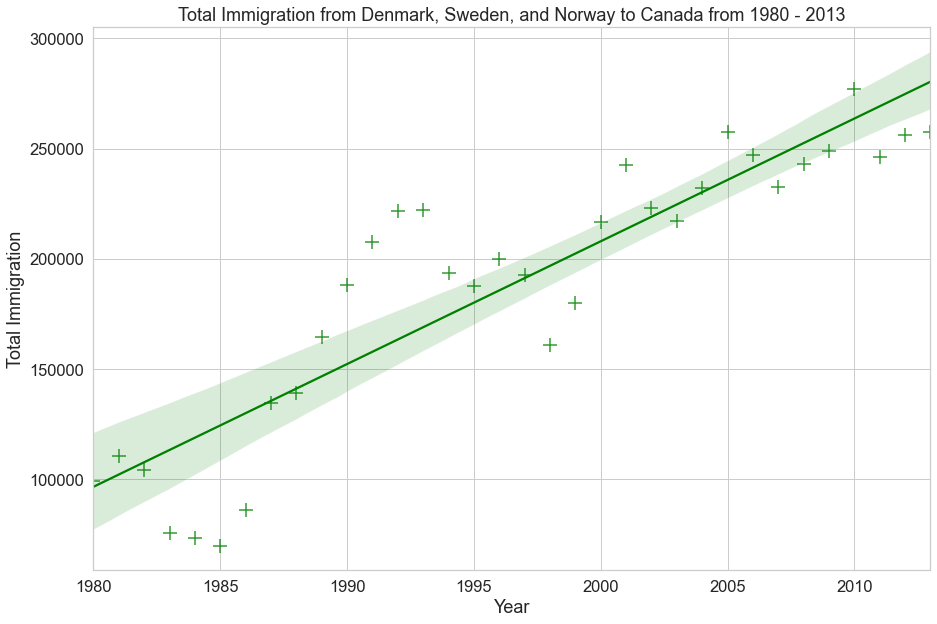

In [48]:
df_countries=df_can.loc[['Denmark','Norway','Sweden'],years].transpose()
df_total=pd.DataFrame(df_countries.sum(axis=1))
df_total.reset_index(inplace=True)
df_total.columns=['year','total']
df_total['year']=df_total['year'].astype(int)

plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax=sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')

# Visualisasi Menengah 2

In [49]:
import numpy as np
import pandas as pd

In [50]:
!pip3 install folium
import folium

In [51]:
import folium

In [52]:
world_map = folium.Map()
world_map

In [53]:
world_map1=folium.Map(location=[-6.4609717,106.8826951],zoom_start=11)
world_map1

In [54]:
world_map=folium.Map(location=[-7.290503, 112.805977],zoom_start=20)
world_map

In [55]:
world_map=folium.Map(location=[-7.290503, 112.805977],zoom_start=20, tiles='Stamen Toner')
world_map

In [56]:
world_map=folium.Map(location=[-7.290503, 112.805977],zoom_start=11, tiles='Stamen Terrain')
world_map

In [57]:
df_incidents=pd.read_csv('Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read')

Dataset downloaded and read


In [58]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [59]:
df_incidents.shape

(150500, 13)

In [60]:
limit=300
df_incidents=df_incidents.iloc[0:limit,:]

In [61]:
df_incidents.shape

(300, 13)

In [62]:
latitude=37.77
longitude=-122.42

In [63]:
sanfran_map=folium.Map(location=[latitude,longitude],zoom_start=12)
sanfran_map

In [64]:
incidents=folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y,df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
sanfran_map.add_child(incidents)

In [65]:
incidents=folium.map.FeatureGroup()

for lat, lng, in zip(df_incidents.Y,df_incidents.X):
    incidents.add_child(
       folium.CircleMarker(
          [lat,lng],
          radius = 5,
          color='yellow',
          fill=True,
          fill_color='blue',
          fill_opacity=0.6
       )
    )
    

latitudes=list(df_incidents.Y)
longitudes=list(df_incidents.X)
labels=list(df_incidents.Category)

for lat, lng, label in zip(latitudes,longitudes,labels):
    folium.Marker([lat,lng], popun=label).add_to(sanfran_map)
    
sanfran_map.add_child(incidents)

In [66]:
sanfran_map=folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6,
    ).add_to(sanfran_map)
    
    
sanfran_map

In [67]:
from folium import plugins

sanfran_map=folium.Map(location=[latitude,longitude], zoom_start = 12)

incidents=plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)
    
sanfran_map

### Chocopleth Maps

In [68]:
df_can=pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                    sheet_name='Canada by Citizenship',
                    skiprows=range(20),
                    skipfooter=2)
print('Data siap')

Data siap


In [69]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2012  2013  \
0    Southern Asia  902  Developing regions    16  ...  2635  2004   
1  Southern Europe  901   Developed regions     1  ...   620   603   
2  Northern Africa  902  Developing regions    80  ...  3774  4331   
3        Polynesia  902  Developing regions     0  ...     0     0   
4  Southern Europe  901   Developed regions     0  ...     1     1   

   Unnamed: 43  Unnamed: 44  Unnamed: 45  Unnamed: 46  Unnamed: 47  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN          NaN   
3          NaN          NaN          NaN          NaN          NaN   
4          NaN          NaN          NaN          NaN          NaN   

   Unnamed: 48  Unnamed: 49  Unnamed: 50  
0          NaN          NaN          NaN  
1          NaN          NaN          NaN  
2          NaN          NaN          NaN  
3          NaN          NaN          NaN  
4          NaN          NaN          NaN  

[5 rows x 51 columns]

In [70]:
df_can.drop(['Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], axis=1, inplace=True)

In [71]:
print(df_can.shape)

(195, 43)


In [72]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1, inplace=True)

In [73]:
df_can.rename(columns={'OdName': 'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns=list(map(str, df_can.columns))
df_can['Total']=df_can.sum(axis=1)
years=list(map(str,range(1980,2014)))
print('Data Dimensions: ', df_can.shape)

Data Dimensions:  (195, 39)


In [74]:
df_can.head()

Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  15699  
2  3774  4331  69439  
3     0     0      6  
4     1     1     15  

[5 rows x 39 columns]

In [75]:
world_geo=r'world_countries.json'

world_map=folium.Map(location=[0,0], zoom_start=2, tiles='Stamen Terrain')

world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country','Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

world_map

C:\Users\ASUS\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
